1. Baseline linear model
2. Residual vs y_pred → bias?
3. Scatter X vs y → identify curvature
4. Add polynomial / interactions (selected cols only)
5. Check residual vs y_pred again
6. Check VIF
7. If funnel → log(y)
8. Check normality LAST


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 1qXoDeYVC4vhd7xTNwohxh9dMCjjtoHoJ


Downloading...
From: https://drive.google.com/uc?id=1qXoDeYVC4vhd7xTNwohxh9dMCjjtoHoJ
To: /content/cars24-car-price-cleaned-new.csv
100% 1.55M/1.55M [00:00<00:00, 59.8MB/s]


In [3]:
df = pd.read_csv('cars24-car-price-cleaned-new.csv')
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [4]:
df.columns

Index(['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'age',
       'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel', 'Electric',
       'LPG', 'Petrol', 'Manual', '5', '>5'],
      dtype='object')

In [5]:
df[['Diesel', 'Electric','LPG', 'Petrol']]

,Diesel,Electric,LPG,Petrol
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
19815,1,0,0,0
19816,0,0,0,1
19817,1,0,0,0
19818,1,0,0,0


In [6]:
df['make'].nunique()

41

In [7]:
df['model'].nunique()

3233

# frequency encoding: we replace categories with their individual frequencies.


In [8]:
df['model'].value_counts()

,count
model,
SWIFT DZIRE VDI,288
ALTO 800 LXI,189
WAGON R VXI,164
SWIFT VDI,150
SWIFT DZIRE VXI,136
...,...
CIAZ 1.4 AT DELTA,1
VENTURE LX,1
INNOVA CRYSTA 2016-2020 2.7 GX MT,1


In [9]:
df[['5', '>5']]

,5,>5
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
19815,1,0
19816,0,1
19817,1,0
19818,0,1


In [10]:
df[[ 'Diesel', 'Electric','LPG', 'Petrol']]

,Diesel,Electric,LPG,Petrol
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
19815,1,0,0,0
19816,0,0,0,1
19817,1,0,0,0
19818,1,0,0,0


In [11]:
# redundant column
columns_to_remove = ['Petrol','>5']
df = df.drop(columns=columns_to_remove, axis=1)

In [12]:
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Manual,5
0,1.20,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1
1,5.50,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1
2,2.15,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1
3,2.26,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1
4,5.70,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,1,1


In [13]:
df.shape

(19820, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   km_driven         19820 non-null  int64  
 2   mileage           19820 non-null  float64
 3   engine            19820 non-null  float64
 4   max_power         19820 non-null  float64
 5   age               19820 non-null  float64
 6   make              19820 non-null  object 
 7   model             19820 non-null  object 
 8   Individual        19820 non-null  int64  
 9   Trustmark Dealer  19820 non-null  int64  
 10  Diesel            19820 non-null  int64  
 11  Electric          19820 non-null  int64  
 12  LPG               19820 non-null  int64  
 13  Manual            19820 non-null  int64  
 14  5                 19820 non-null  int64  
dtypes: float64(5), int64(8), object(2)
memory usage: 2.3+ MB


In [15]:
df.isna().sum()

,0
selling_price,0
km_driven,0
mileage,0
engine,0
max_power,0
age,0
make,0
model,0
Individual,0
Trustmark Dealer,0


In [16]:
df.columns

Index(['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'age',
       'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel', 'Electric',
       'LPG', 'Manual', '5'],
      dtype='object')

In [17]:
df['make'].value_counts()

,count
make,
MARUTI,5650
HYUNDAI,3562
HONDA,1779
MAHINDRA,1276
TOYOTA,1189
TATA,971
FORD,900
VOLKSWAGEN,761
RENAULT,636


In [18]:
df['model'].value_counts()

,count
model,
SWIFT DZIRE VDI,288
ALTO 800 LXI,189
WAGON R VXI,164
SWIFT VDI,150
SWIFT DZIRE VXI,136
...,...
CIAZ 1.4 AT DELTA,1
VENTURE LX,1
INNOVA CRYSTA 2016-2020 2.7 GX MT,1


Because 'make' and 'model' columns have multiple categories, we can use frequency encoder or target encoding but after train test split

In [19]:
df.describe()

,selling_price,km_driven,mileage,engine,max_power,age,Individual,Trustmark Dealer,Diesel,Electric,LPG,Manual,5
count,19820.000000,1.982000e+04,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000
mean,6.585509,5.815856e+04,19.503402,1475.702381,98.122907,8.438547,0.390666,0.009586,0.492583,0.000404,0.003229,0.802674,0.835015
std,4.847364,5.171563e+04,4.297784,518.571223,44.761727,3.196636,0.487912,0.097442,0.499958,0.020087,0.056734,0.397990,0.371176
min,0.300000,1.000000e+02,4.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.410000,3.100000e+04,16.950000,1197.000000,73.900000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,5.200000,5.200000e+04,19.300000,1248.000000,86.800000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,7.850000,7.400000e+04,22.320000,1582.000000,112.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,20.902500,3.800000e+06,120.000000,6752.000000,626.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df1 = df.copy()
df1.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Manual,5
0,1.20,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1
1,5.50,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1
2,2.15,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1
3,2.26,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1
4,5.70,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,1,1


In [21]:
X = df1.iloc[:,1:]
y = df1.iloc[:,0]

In [22]:
from sklearn.model_selection  import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

we can use train , validation and test datasets. for hyperparameter testing/ accuracy metrics we will use validation data. and for final testing we will use test data

In [24]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)
# X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size=0.5, random_state=42)

In [25]:
X_train.shape

(15856, 14)

In [26]:
y_train.shape

(15856,)

In [27]:
X_test.shape

(3964, 14)

In [28]:
y_test.shape

(3964,)

for ordinal encoding column

In [29]:
# owner_order = {
#     'First Owner': 0,
#     'Second Owner': 1,
#     'Third Owner': 2,
#     'Fourth Owner': 3
# }

# X_train['owner_ord'] = X_train['owner'].map(owner_order)
# X_test['owner_ord']  = X_test['owner'].map(owner_order)

# X_train.drop(columns=['owner'], inplace=True)
# X_test.drop(columns=['owner'], inplace=True)


## Better for pipeline integration(scaleable)

# from sklearn.preprocessing import OrdinalEncoder

# ord_cols = ['owner']
# ord_encoder = OrdinalEncoder(categories=[
#     ['First Owner', 'Second Owner', 'Third Owner', 'Fourth Owner']
# ])

# X_train[ord_cols] = ord_encoder.fit_transform(X_train[ord_cols])
# X_test[ord_cols]  = ord_encoder.transform(X_test[ord_cols])

In [30]:
df.columns

Index(['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'age',
       'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel', 'Electric',
       'LPG', 'Manual', '5'],
      dtype='object')

In [31]:
# columns to frequency encode for high-cardinality cols
freq_cols = ['make', 'model']
X_train_frq = X_train.copy()
X_test_frq = X_test.copy()

for col in freq_cols:
  freq_map = X_train_frq[col].value_counts(normalize=True)

  X_train_frq[col + '_freq'] = X_train_frq[col].map(freq_map)
  X_test_frq[col + '_freq'] = X_test_frq[col].map(freq_map).fillna(0)

  X_train_frq.drop(columns=[col], inplace=True)
  X_test_frq.drop(columns=[col], inplace=True)

X_train_frq_sc = X_train_frq.copy()
X_test_frq_sc = X_test_frq.copy()

# Applied Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols =['km_driven', 'mileage', 'engine', 'age', 'max_power']
X_train_frq_sc[num_cols] = scaler.fit_transform(X_train_frq_sc[num_cols])
X_test_frq_sc[num_cols]  = scaler.transform(X_test_frq_sc[num_cols])


# Linear Regression model
from sklearn.linear_model import LinearRegression
model_freq = LinearRegression()
model_freq.fit(X_train_frq_sc, y_train)

y_pred = model_freq.predict(X_test_frq_sc)
y_train_pred = model_freq.predict(X_train_frq_sc)

from sklearn.metrics import r2_score
print("Test R2 (frquency encoded):", r2_score(y_test, y_pred))
print("Train R2 (frquency encoded):", r2_score(y_train, y_train_pred))

Test R2 (frquency encoded): 0.7778480845807777
Train R2 (frquency encoded): 0.7785155612268845


In [32]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# --- Target Encoding for 'model' column ---
X_train_trgt = X_train.copy()
X_train_trgt['model_te'] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(X_train): # split X_train (original, with make/model)
    X_tr = X_train.iloc[train_idx] # X_tr has original make/model
    y_tr = y_train.iloc[train_idx]

    # Use .iloc for X_val as it expects integer positions
    X_val = X_train.iloc[val_idx]
    # Get the actual index labels for the validation fold from X_train's index
    val_labels = X_train.index[val_idx]

    fold_map_model = X_tr.join(y_tr).groupby('model')['selling_price'].mean()

    # Map 'model' column from X_val (original values) to 'model_te' in X_train_trgt
    # Use the actual index labels (val_labels) for .loc assignment
    X_train_trgt.loc[val_labels, 'model_te'] = X_val['model'].map(fold_map_model)

X_train_trgt['model_te'] = X_train_trgt['model_te'].fillna(y_train.mean())
X_train_trgt.drop(columns='model', inplace=True) # Drop original 'model' from X_train_trgt

# Final map for 'model' on the test set
final_map_model = X_train.join(y_train).groupby('model')['selling_price'].mean()

X_test_trgt = X_test.copy()
X_test_trgt['model_te'] = X_test_trgt['model'].map(final_map_model)
X_test_trgt['model_te'] = X_test_trgt['model_te'].fillna(y_train.mean())
X_test_trgt.drop(columns='model', inplace=True) # Drop original 'model' from X_test_trgt


# --- Target Encoding for 'make' column (add this part) ---
X_train_trgt['make_te'] = np.nan # Add new target encoded column for 'make'

for train_idx, val_idx in kf.split(X_train): # split X_train (original, with make/model)

    X_tr = X_train.iloc[train_idx] # X_tr has original make/model
    y_tr = y_train.iloc[train_idx]

    # Use .iloc for X_val as it expects integer positions
    X_val = X_train.iloc[val_idx]
    # Get the actual index labels for the validation fold from X_train's index
    val_labels = X_train.index[val_idx]

    fold_map_make = X_tr.join(y_tr).groupby('make')['selling_price'].mean()

    # Map 'make' column from X_val (original values) to 'make_te' in X_train_trgt
    # Use the actual index labels (val_labels) for .loc assignment
    X_train_trgt.loc[val_labels, 'make_te'] = X_val['make'].map(fold_map_make)

X_train_trgt['make_te'] = X_train_trgt['make_te'].fillna(y_train.mean())
X_train_trgt.drop(columns='make', inplace=True) # Drop original 'make' from X_train_trgt

# Final map for 'make' on the test set
final_map_make = X_train.join(y_train).groupby('make')['selling_price'].mean()

X_test_trgt['make_te'] = X_test_trgt['make'].map(final_map_make)
X_test_trgt['make_te'] = X_test_trgt['make_te'].fillna(y_train.mean())
X_test_trgt.drop(columns='make', inplace=True) # Drop original 'make' from X_test_trgt


X_train_trgt_sc = X_train_trgt.copy()
X_test_trgt_sc = X_test_trgt.copy()

# Applied Standard scaler
scaler = StandardScaler()
num_cols =['km_driven', 'mileage', 'engine', 'age', 'max_power']
X_train_trgt_sc[num_cols] = scaler.fit_transform(X_train_trgt_sc[num_cols])
X_test_trgt_sc[num_cols]  = scaler.transform(X_test_trgt_sc[num_cols])


# --- Train Linear Regression model ---
model = LinearRegression()
model.fit(X_train_trgt_sc, y_train)

y_pred = model.predict(X_test_trgt_sc)
print("Test R2 (Target):", r2_score(y_test, y_pred))
print("Train R2 (Target):", model.score(X_train_trgt_sc, y_train))

Test R2 (Target): 0.8928817911033113
Train R2 (Target): 0.8810207392947125


In [33]:
coef = model.coef_
coef

array([-0.19513458, -0.19510439,  0.20303347,  0.91991169, -1.23936738,
       -0.19897165, -0.27336623,  0.67800001,  3.54926748,  0.84486725,
       -0.78534127, -0.09114888,  0.44400077,  0.31753229])

In [34]:
coef_df = pd.Series(abs(coef), index=df1.iloc[:,1:].columns, name='coef')
coef_df.sort_values(ascending=False)

,coef
Trustmark Dealer,3.549267
age,1.239367
max_power,0.919912
Diesel,0.844867
Electric,0.785341
Individual,0.678000
Manual,0.444001
5,0.317532
model,0.273366
engine,0.203033


In [35]:
model.intercept_

np.float64(2.0610327223037386)

In [36]:
from sklearn.metrics import r2_score
score_r2 = r2_score(y_test, y_pred)
score_r2

0.8928817911033113

## Adjusted R-square

In [37]:
n= X_test_trgt.shape[0]
k = X_test_trgt.shape[1]
adj_r2_test = 1-((1-score_r2)*(n-1) / (n-k-1))
adj_r2_test

0.8925020354880787

## KFold cross validation

In [38]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True)
model1 = LinearRegression()

In [39]:
scores = cross_val_score(model1, X_train_trgt_sc, y_train, cv=kfold)
scores.mean()

np.float64(0.8799190966751638)

## Assumptions


* Linearity ❌
   
   ↓
* Transform / Engineer / Change model
   
   ↓
* Linearity OK ((Original & transformed X (not scaled)))
   
   ↓
* Check Independence (MUST check when:Time series data/ Panel /longitudinal data/Ordered observations (daily sales, monthly revenue))
   
   ↓
* Check Homoscedasticity (Residuals vs y_train_pred)
   
   ↓
* Check Multicollinearity (Transformed X (not scaled))
   
   ↓
* Check Normality  (Residuals)


Note:
    
    1. Always check linearity on original X not on scaled X
    2. Always apply log transformation/ polynomial feature on original X and then apply standardscaler if required


1. Linearity , it means whether numerical columns hold linear relation with target columns

In [40]:
X_train_trgt.columns

Index(['km_driven', 'mileage', 'engine', 'max_power', 'age', 'Individual',
       'Trustmark Dealer', 'Diesel', 'Electric', 'LPG', 'Manual', '5',
       'model_te', 'make_te'],
      dtype='object')

In [41]:
# columns and their number of unique values
for i in X_train_trgt.columns:
  print(i, f"col has {X_train_trgt[i].nunique()} values")

km_driven col has 3731 values
mileage col has 515 values
engine col has 162 values
max_power col has 467 values
age col has 27 values
Individual col has 2 values
Trustmark Dealer col has 2 values
Diesel col has 2 values
Electric col has 2 values
LPG col has 2 values
Manual col has 2 values
5 col has 2 values
model_te col has 3846 values
make_te col has 143 values


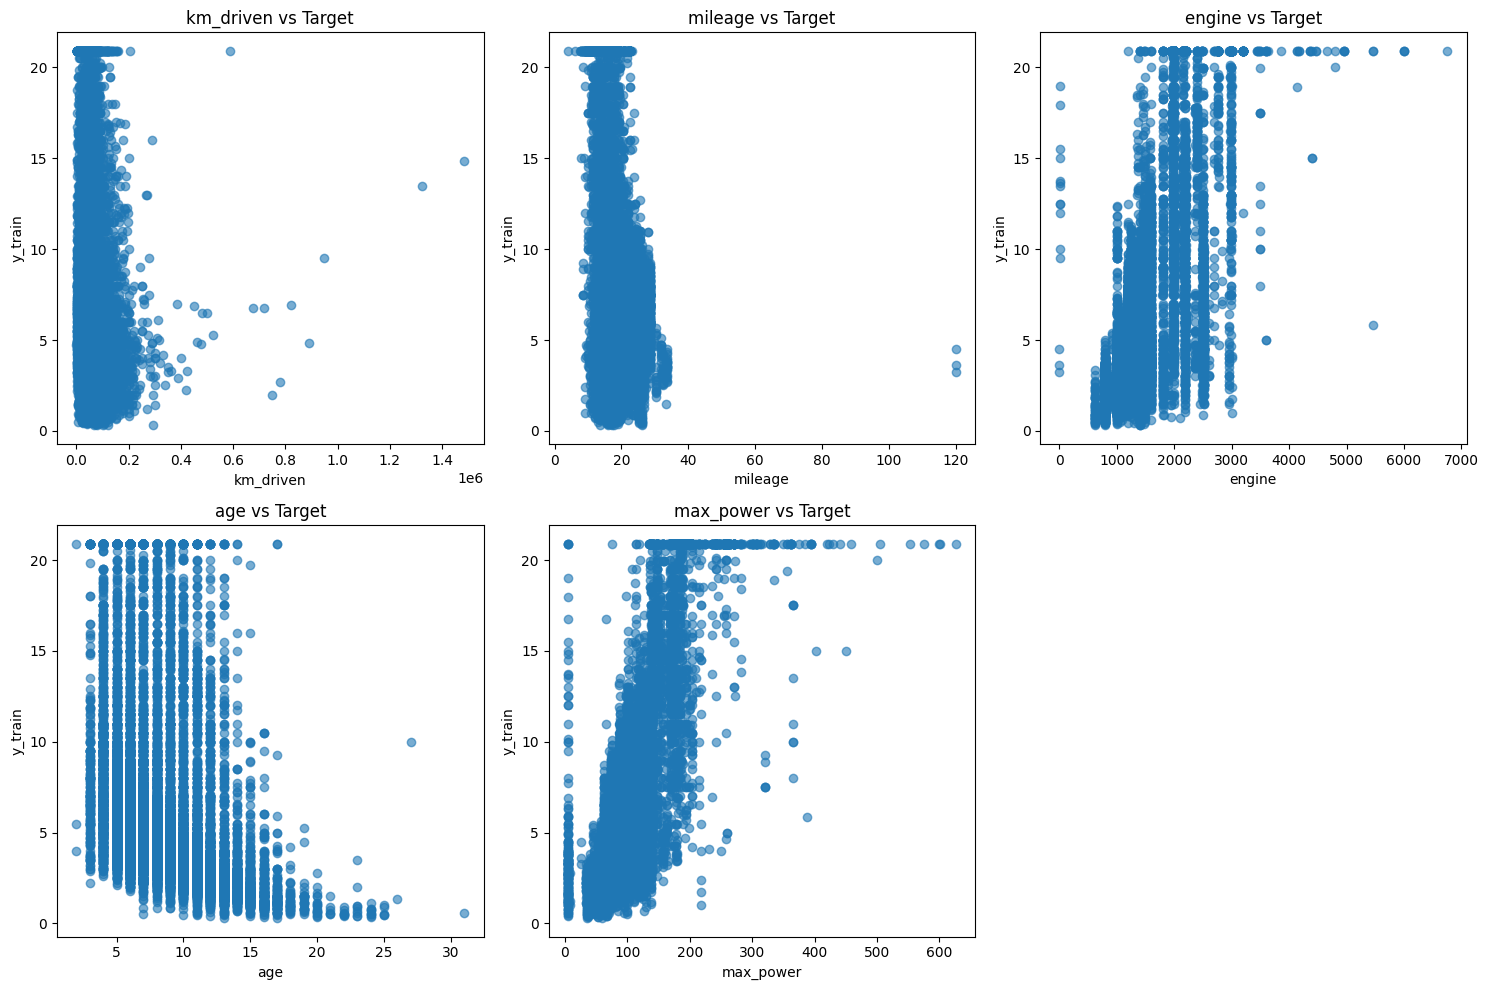

In [42]:
import matplotlib.pyplot as plt
import numpy as np

num_cols =['km_driven', 'mileage', 'engine', 'age', 'max_power']
n_cols = 3  # number of plots per row
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(X_train_trgt[col], y_train, alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('y_train')
    plt.title(f'{col} vs Target')

plt.tight_layout()
plt.show()

In [43]:
X_train_trgt.columns

Index(['km_driven', 'mileage', 'engine', 'max_power', 'age', 'Individual',
       'Trustmark Dealer', 'Diesel', 'Electric', 'LPG', 'Manual', '5',
       'model_te', 'make_te'],
      dtype='object')

In [44]:
X_train_trgt_trf =X_train_trgt.copy()
X_test_trgt_trf = X_test_trgt.copy()

In [45]:
# Applied the transformation
X_train_trgt_trf['km_driven'] = np.log1p(X_train_trgt_trf['km_driven'])  # decreasing curve
X_test_trgt_trf['km_driven'] = np.log1p(X_test_trgt_trf['km_driven'])

X_train_trgt_trf['mileage'] = np.log1p(X_train_trgt_trf['mileage'])  # decreasing curve
X_test_trgt_trf['mileage'] = np.log1p(X_test_trgt_trf['mileage'])

X_train_trgt_trf['engine'] = np.log1p(X_train_trgt_trf['engine'])  # increasing curve
X_test_trgt_trf['engine'] = np.log1p(X_test_trgt_trf['engine'])

X_train_trgt_trf['age'] = np.log1p(X_train_trgt_trf['age'])   # decreasing curve
X_test_trgt_trf['age'] = np.log1p(X_test_trgt_trf['age'])

# for explainability we will use VIF first right after transformations then polynomial feature if required
# also, we never use polynomial features to target encoded columns

from sklearn.preprocessing import PolynomialFeatures
poly =PolynomialFeatures(degree=2, include_bias =False)

X_train_trgt_trf[['max_power1', 'max_power2']] = poly.fit_transform(X_train_trgt_trf[['max_power']])   # increasing curve  # poly
X_test_trgt_trf[['max_power1', 'max_power2']] = poly.transform(X_test_trgt_trf[['max_power']])

X_train_trgt_trf.drop(columns=['max_power'], inplace=True)
X_test_trgt_trf.drop(columns=['max_power'], inplace=True)

In [46]:
X_train_trgt_trf[['max_power1', 'max_power2']].head()

,max_power1,max_power2
5662,103.6,10732.96
4556,181.0,32761.00
7094,74.0,5476.00
1441,84.0,7056.00
17079,130.0,16900.00


In [47]:
scaler = StandardScaler()

# num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns   # but here, it will also select encoded columns
num_cols =['km_driven', 'mileage', 'engine', 'age', 'max_power1', 'max_power2']
X_train_trgt_trf[num_cols] = scaler.fit_transform(X_train_trgt_trf[num_cols])
X_test_trgt_trf[num_cols]  = scaler.transform(X_test_trgt_trf[num_cols])


In [48]:
X_train_trgt.shape

(15856, 14)

In [49]:
model = LinearRegression()
model.fit(X_train_trgt_trf, y_train)
y_pred = model.predict(X_test_trgt_trf)

In [50]:
model.score(X_train_trgt_trf, y_train)

0.8830861532693617

In [51]:
model.score(X_test_trgt_trf, y_test)

0.8986127540119925

In [52]:
r2_score(y_test,y_pred)

0.8986127540119925

In [53]:
# Adjusted r2 score
from sklearn.metrics import r2_score
score_r2 = r2_score(y_test, y_pred)
# score_r2
n= X_test_trgt.shape[0]
k = X_test_trgt.shape[1]
adj_r2_test = 1-((1-score_r2)*(n-1) / (n-k-1))
adj_r2_test

0.8982533158140101

In [54]:
# if it get overfitted, then we will use Ridge (since less columns present)
from sklearn.linear_model import Ridge, Lasso
alpha = [0.01, 0.1, 1, 2, 3, 10, 50, 100]
for a in alpha:
  r_model = Ridge(alpha=a)
  r_model.fit(X_train_trgt_trf, y_train)
  train_score = r_model.score(X_train_trgt_trf, y_train)
  test_score = r_model.score(X_test_trgt_trf, y_test)
  print(f"Alpha: {a}, Train R-squared: {train_score:.4f}, Test R-squared: {test_score:.4f}")

Alpha: 0.01, Train R-squared: 0.8831, Test R-squared: 0.8986
Alpha: 0.1, Train R-squared: 0.8831, Test R-squared: 0.8986
Alpha: 1, Train R-squared: 0.8831, Test R-squared: 0.8986
Alpha: 2, Train R-squared: 0.8831, Test R-squared: 0.8986
Alpha: 3, Train R-squared: 0.8831, Test R-squared: 0.8986
Alpha: 10, Train R-squared: 0.8830, Test R-squared: 0.8986
Alpha: 50, Train R-squared: 0.8830, Test R-squared: 0.8987
Alpha: 100, Train R-squared: 0.8829, Test R-squared: 0.8987


All R-squared values of Ridge model are same

In [55]:
# we will use Lasso , if large number of features
alpha = [.01,.1,1,2]
for a in alpha:
  l_model = Lasso(alpha=a)
  l_model.fit(X_train_trgt_trf,y_train)
  train_score = l_model.score(X_train_trgt_trf,y_train)
  test_score =l_model.score(X_test_trgt_trf,y_test)
  print(f"Alpha: {a}, Train R-squared: {train_score:.4f}, Test R-squared: {test_score:.4f}")

Alpha: 0.01, Train R-squared: 0.8827, Test R-squared: 0.8986
Alpha: 0.1, Train R-squared: 0.8744, Test R-squared: 0.8931
Alpha: 1, Train R-squared: 0.7993, Test R-squared: 0.8212
Alpha: 2, Train R-squared: 0.7889, Test R-squared: 0.8104


In [56]:
# keeping the linear model
y_pred = model.predict(X_test_trgt_trf)

In [57]:
res = y_test - y_pred

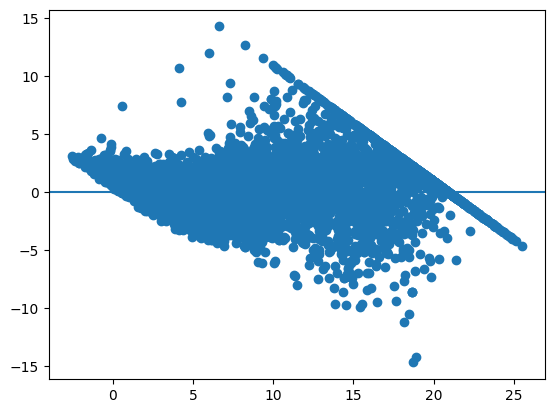

In [58]:
y_pred_train = model.predict(X_train_trgt_trf)
residuals = y_train - y_pred_train
plt.scatter(y_pred_train, residuals)
plt.axhline(0)
plt.show()

* Residuals vs ŷ show a trend
* Heteroscedasticity (wedge shape)

In [59]:
# applying log transform
y_train_ln = np.log1p(y_train)
y_test_ln = np.log1p(y_test)

If I apply log transformation on target column then need to Recheck below:

1. Linearity

2. Heteroscedasticity

3. Normality

Steps to remember:

1. Check linearity (original X vs y)
   
   ↓
2. Apply log / polynomial on original X
   
   ↓
3. Scale features
   
   ↓
4. Train model
   
   ↓
5. (Optional) VIF check → for inference only
   
   ↓
6. Check heteroscedasticity (residuals vs y_pred)
   
   ↓
  
   If heteroscedastic →
      
       * log(y)
       * retrain
       * recheck
   
   ↓
7. Check normality of residuals (optional)


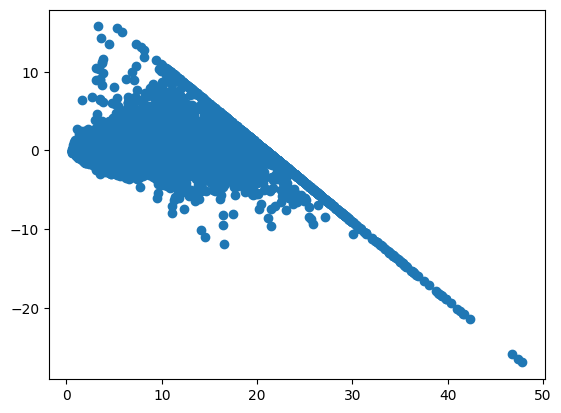

In [60]:
model.fit(X_train_trgt_trf, y_train_ln)
y_pred_ln = model.predict(X_train_trgt_trf)
y_pred = np.expm1(y_pred_ln)
residuals = y_train - y_pred


plt.scatter(y_pred, residuals)
# plt.axhline(0, color ='r')
plt.show()


this mean log transformation on target didnot fix the issue. and we can try more polynomial degree

### multi-collinearity (VIF)

In [61]:
X_train_trgt.columns

Index(['km_driven', 'mileage', 'engine', 'max_power', 'age', 'Individual',
       'Trustmark Dealer', 'Diesel', 'Electric', 'LPG', 'Manual', '5',
       'model_te', 'make_te'],
      dtype='object')

In [62]:
# use loop to get the col having low VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline

In [63]:
X_train_trgt.columns

Index(['km_driven', 'mileage', 'engine', 'max_power', 'age', 'Individual',
       'Trustmark Dealer', 'Diesel', 'Electric', 'LPG', 'Manual', '5',
       'model_te', 'make_te'],
      dtype='object')

In [64]:
removed_col =[]
col = X_train_trgt.columns
train_data = X_train_trgt.copy()
for i in range(len(X_train_trgt.columns)):
  col = [i for i in X_train_trgt.columns if i not in removed_col]
  train_data = train_data[col]
  vif_data = pd.DataFrame()
  vif_data['feature'] = col
  vif_data['VIF'] = [variance_inflation_factor(train_data.values , i) for i in range(vif_data.shape[0])]
  feature_to_remove = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True).iloc[0]['feature']
  removed_col.append(feature_to_remove)
  val = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True).iloc[0]['VIF']
  print(vif_data.sort_values(by='VIF', ascending=False))
  print('*'*10)
  if val <10:
    break

             feature        VIF
2             engine  37.547834
3          max_power  25.818541
1            mileage  21.038821
13           make_te  11.552860
4                age  10.476765
11                 5   9.748942
12          model_te   9.737962
10            Manual   8.063848
0          km_driven   3.634348
7             Diesel   3.111729
5         Individual   1.761151
8           Electric   1.064552
6   Trustmark Dealer   1.029429
9                LPG   1.013971
**********
             feature        VIF
1            mileage  20.967004
2          max_power  13.624968
12           make_te  11.363497
11          model_te   9.378918
3                age   9.337363
10                 5   8.839836
9             Manual   7.373011
0          km_driven   3.571591
6             Diesel   2.946731
4         Individual   1.754034
7           Electric   1.064449
5   Trustmark Dealer   1.028668
8                LPG   1.013777
**********
             feature        VIF
1          max_pow

* most of the numerical col are removed, only categorical and target encoded col left.

* remove all features of VIF for inference(explainability model) but no need to remove any thing for prediction model , if high multi-collinearity present in prediction model we can use Ridge



In [65]:
removed_col

['engine', 'mileage', 'max_power', 'make_te']

In [66]:
cols = [c for c in X_train_trgt.columns if c not in removed_col]
cols

['km_driven',
 'age',
 'Individual',
 'Trustmark Dealer',
 'Diesel',
 'Electric',
 'LPG',
 'Manual',
 '5',
 'model_te']

In [67]:
X_train_trgt_vif = X_train_trgt[cols]
X_test_trgt_vif = X_test_trgt[cols]

model_exp = LinearRegression()
model_exp.fit(X_train_trgt_vif,y_train)
y_pred = model_exp.predict(X_test_trgt_vif)
r2_score(y_test, y_pred)


0.8253028980862323

In [68]:
model_exp.coef_

array([-4.01242717e-06, -2.42733402e-01, -3.99350915e-01, -3.63016895e-01,
        7.74518467e-01, -6.67708959e-01,  3.88778825e-01, -2.09788660e+00,
       -5.94872392e-01,  7.64516898e-01])

In [69]:
model_exp.intercept_

np.float64(5.860979786054632)

In [70]:
r2_score(y_test, y_pred)

0.8253028980862323

 Steps:

 log transform ->  VIF(if explainability) -> polynomialfeature -> standardscaler , we can apply this way

2. Normality of Residuals

In [71]:
residual = y_test - y_pred
residual

,selling_price
960,2.030680
4073,-0.839874
4339,0.428555
19325,-0.540816
438,0.523397
...,...
12402,-0.224220
12460,12.789655
11335,1.623229
13071,0.918357


### errors are normally distributed

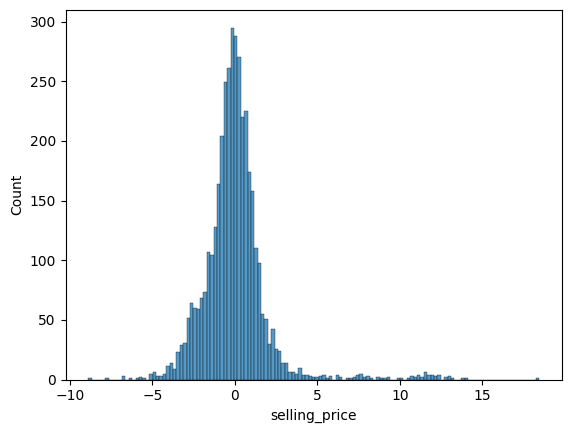

In [77]:
sns.histplot(residual)
plt.show()

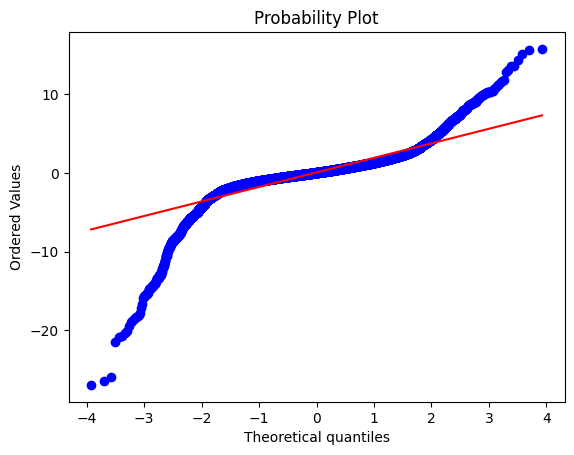

In [78]:
from scipy import stats as st
st.probplot(residual, dist='norm', plot=plt)
plt.show()

In [74]:
_, p = st.shapiro(residual)
p

np.float64(4.381881364339759e-57)

| p-value | Conclusion |
| ------- | ---------- |
| > 0.05  | Normal     |
| ≤ 0.05  | Not normal |


## Notes:
1.  we need to apply log transformation before scaling in train data (independent numerical columns only) then residual will become normal distributed.

2.  a. Normal residuals are mainly needed for:

   *  Confidence intervals

   * Hypothesis testing

   * p-values

   * Interpretability

  b. For prediction only:

  * Linearity

  * Homoscedasticity

  * Low bias

matter more than perfect normality.


 3. we can check the target col if it is not normal then apply log transform to target as well separately , and inverse it while calculating the residual

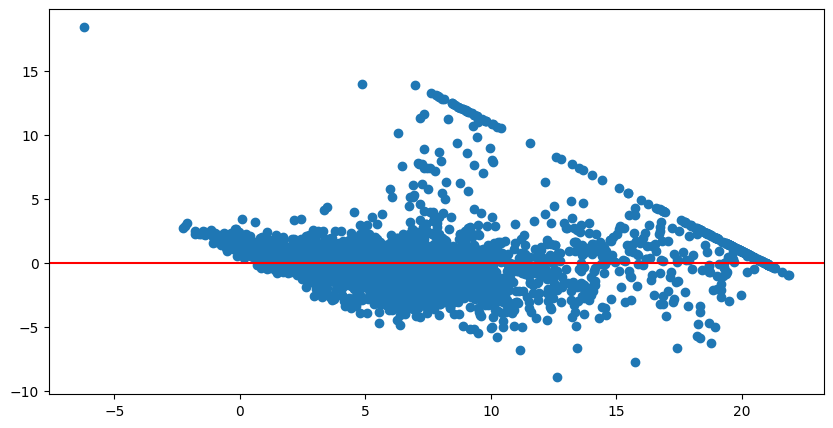

In [75]:
plt.figure(figsize=(10,5))
plt.scatter( y_pred, residual)
plt.axhline(0, color='r')
plt.show()

* Random scatter → linearity holds
 * Curved pattern → non-linear relationship

 Also

 *  Constant spread → OK
* Funnel shape → heteroscedasticity